In [28]:
"""Step#1 행렬 인수분해 초기화하기 구현"""
import numpy as np

#처음 시작할 때는 임의의 값으로 시작하여 나중에 gradient descent로 보강하는 것이므로 우선:
def initialize(R, num_features):
    num_users, num_items = R.shape
    Theta = np.random.rand(num_users, num_features)
    X= np.random.rand(num_features, num_items)
    return Theta, X

#raw data가 아래와 같이 있다고 가정하자
R = np.array([
    [3, 4, 1, np.nan, 1, 2],
    [4, 4, 3, np.nan, 5, 3],
    [2, 3, np.nan, 1, 3, 4],
    [1, 3, 2, 4, 2, 2],
    [1, 2, np.nan, 2, 2, 4],
    ])

Theta, X = initialize(R, 2)
print(Theta, X)


[[0.35 0.01]
 [0.17 0.06]
 [0.28 0.35]
 [0.59 0.78]
 [0.62 0.16]] [[0.89 0.73 0.5  0.64 0.51 0.17]
 [0.64 0.99 0.77 0.18 0.12 0.93]]


(array([[-0.35,  1.56,  0.31, -0.21, -0.26],
        [ 0.92,  0.21,  0.36,  0.56,  0.99],
        [ 0.48,  0.55, -0.19,  0.06,  1.71],
        [-0.64,  1.03,  0.35, -0.32,  0.13],
        [-0.39, -0.68,  0.44,  0.05,  1.05],
        [ 0.07, -0.64,  0.92,  1.23, -0.58],
        [ 0.33,  0.93, -1.21,  2.09,  0.27],
        [ 0.79, -0.48,  1.12,  0.05,  0.46],
        [ 1.06, -0.68, -0.28,  0.18, -1.12],
        [ 0.39,  0.63,  0.14,  0.98,  0.1 ],
        [ 1.47,  0.62, -0.91, -0.29, -0.35],
        [-1.56,  0.77,  0.83,  1.1 ,  0.13],
        [-0.89,  0.47,  0.47, -0.25,  0.81],
        [ 0.86, -0.13, -1.01,  0.2 ,  0.76],
        [-0.53, -1.14, -0.47,  0.08, -0.72],
        [-0.27, -0.07,  0.41,  0.49,  1.5 ],
        [ 0.17, -0.01,  0.07, -1.66,  0.27],
        [ 1.32,  0.88,  0.83,  0.72, -1.09],
        [-0.17, -1.68,  1.86, -0.16, -0.26],
        [-0.88, -0.53, -1.33,  0.14,  0.19]]),
 array([[ 0.12,  0.48, -2.18, -0.67, -1.05,  0.41,  0.03, -0.37, -0.86,
          0.44, -0.71,  1.

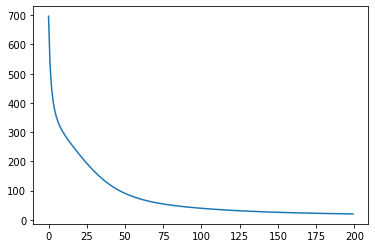

In [38]:
"""Step#2 행렬인수분해 경사하강법 구현"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(5)#--일정한 값을 고정해서 내고싶다면 이 값을 설정하자
data_path = 'C:/Users/공성식/Desktop/WORKSTATION/Python Workplace/codeit/intermediate_machine_learning/matrix_ratings.csv'

#표기 데이터 소수점 설정
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

#Theta 와 X값으로 예측값을 계산하는 함수 predict
#이 경우 이미 Theta.T 처럼 data를 형성시켜 놓았으니 그냥 바로 행렬곱연산하면 된다.
def predict(Theta, X):
    return Theta@X

#mse 손실함수 cost
def cost(prediction, R):
    return np.nansum((prediction- R)**2)

#initialize함수는 위에서 작성했으니 다시쓰지 않는다.

#경사하강 함수- 몇번 경사하강할 것인지 정하는 파라미터 iteration을 받는다.
def gradient_descent_matrix(R, Theta, X, alpha, iteration, lambda_):
    num_user, num_items = R.shape
    num_features = len(X)
    costs = []

    for _ in range(iteration):
        prediction = predict(Theta, X)
        error = prediction - R
        costs.append(cost(prediction,R))

        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]):#nan값이 아닐 경우에만 계산한다는 조건
                    for k in range(num_features):
                        Theta[i][k] -= alpha*(np.nansum(error[i,:]*X[k,:])+lambda_*Theta[i][k])
                        X[k][j] -= alpha*(np.nansum(error[:,j]*Theta[:,k])+lambda_*X[k][j])
    return Theta, X, costs, error

ratings_df = pd.read_csv(data_path, index_col = 'user_id')

#mean normalization을 적용
for row in ratings_df.values:
    row-=np.nanmean(row)
    
R=ratings_df.values

Theta, X = initialize(R, 5)
Theta, X, costs, error = gradient_descent_matrix(R,Theta,X,0.001,200,0.01)
plt.plot(costs)
Theta, X

In [ ]:
#코드 작성시 팁: 시그마연산을 np행렬연산으로 구현하면서, 어떤 변수에 대해 시그마가 진행되는지 보면 헷갈리거나 실수할 가능성이 적어진다.